# Categorical Variables Correlation 

It is very common to estimate the correlation between numeric variables. In these cases, we can easily use Pearson, Spearman, or Kendall correlation. However, often we have both numeric and categorical variables, and in these situations, we cannot use traditional correlation metrics. Instead, we need to use different methods. Don't worry, there are plenty of ways to estimate correlation between categorical and categorical variables or categorical and numerical variables.

You may think that you need to write a lot of code to determine correlation for all data types. Don't worry 😊 there is a library that automatically detects data types and calculates the correlation between all variables, even if you want it to give a correlation heatmap without dealing with Matplotlib or Seaborn. This library is called Dython. If you would like to check it out and see more details, click the [link](http://shakedzy.xyz/dython/)  to go to the documentation page.

So before writing code I want to mention about how to calculate correlation between categorical to categorical variables. I won't give other correlations detail.

## $\chi^2$ Chi-Square Test

The Chi-square test is a hypothesis test used to determine if there is a statistically significant relationship between two categorical variables.
The Chi-square test for independence is used to test whether there is independence between two categorical variables. The goal is to analyze if the values of the first variable are affected by the values of the second variable, and vice versa. For example, does gender affect whether a person leaves their job or not? As two variables, gender (male, female) and leaving the job (yes, no), the system checks if they are independent or not, if not, there is a relationship between the characteristics.

The research question that can be answered with the Chi-square test is:

**Is the attribute of gender and the attribute of job leaving independent from each other?**

Hypothesis for this research question,

$H_0$: There is no relationship between job leaving and gender.

$H_1$: There a relationship between job leaving and gender.

In order to estimate the test statistic, we need to create a contingency table. You can see an example of a contingency table below.

$$ 
\begin{matrix}
      & Yes & No \\ \hline
      Female & 10 & 13 \\
      Male & 15 & 14 \\
      \hline
    \end{matrix} $$
    
**Test Statistic**

$$ \chi^2 = \sum_{k=1}^{n} {(O_k-E_k)^2 \over E_k} $$

where $ O_k $ is observed frequency and $ E_k $ is expected frequency.

$$ E_k = {\text{Row Total} \times \text{Column Total}\over N}$$

If $ p < 0.05 $, reject the $H_0$ hypothesis. 

With this statistic, we were able to determine whether there is a relationship between the two variables, but we need another metric to show how strong this relationship is.

## Cramers V Association

So far we only know that we can reject the null hypothesis, but the strength of the relationship between the two variables is often of great interest. This can be answered by Cramer's V correlation.

It ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association between the two variables.


$$ \begin{matrix} \text{Effect Size} & \text{Crammers V} \\ \hline \text{Small} & 0.1 \\ \hline \text{Medium}& 0.3 \\ \hline \text{Large} & 0.5 \end{matrix} $$

Formula is 

$$ V = \sqrt{{\chi^2 \backslash n} \over  min(r-1, c-1)}$$

$\chi^2$= chi-square statistic

n = sample size

r = number of rows in the contingency table

c = number of columns in the contingency table

OK, theory time is over, let's start coding 💻

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install dython
from dython.nominal import associations # correlation calculation
from scipy.stats import chi2_contingency #chi square test

data = pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv') # read the data

## Let's Explore Data First

We have 35 columns and I will deal with assosiation between attrition and other variables. I want to answer these questions.

Is there a any significant relationship between attrion and Education, Age, Department.

Firstly, lets check weather any statisticaly significant relationship between attrition and education in order to determine that lets do chi-square test.

In [2]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
crosstab = pd.crosstab(data.Attrition, data.Education) # create a contingecy table
crosstab

Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


In [4]:
chi_square_stat, p_value, _, _ = chi2_contingency(crosstab) # chi-square test
print(f'p value of chi-square test:{p_value:.3f}')

p value of chi-square test:0.546


This p value means that there is no statistically significant relationship between attrition and education. That's why we do not need to estimate crammer v assosiation. Now let's check the is there a any relationship between attrition and department.

In [5]:
crosstab = pd.crosstab(data.Attrition, data.Department) # create a contingecy table
chi_square_stat, p_value, _, _ = chi2_contingency(crosstab) # chi-square test
print(f'p value of chi-square test:{p_value:.4f}')

p value of chi-square test:0.0045


This p-value means that there is a statistically significant relationship between attrition and department. So, one or more departments may tend to have higher attrition rates than other departments. Let's check how strong that relationship is using Cramer's V association.

We will use the Dython library to estimate that association.

In [6]:
correlation_matrix = associations(data, compute_only=True)["corr"] # gives correlation between all variables in the dataset
correlation = correlation_matrix.loc[['Department']].drop('Department', axis=1)['Attrition'].values.item() # We extracted correlation between attrition and department
print(f'Assosiation between Attrition and Department is {correlation:.3f}')

Assosiation between Attrition and Department is 0.077


This result indicates that the strength of the association between Attrition and Department is weak, even though it is a statistically significant relationship.

Let's also estimate the correlation between Age and Attrition.

In [7]:
correlation = correlation_matrix.loc[['Age']].drop('Age', axis=1)['Attrition'].values.item() # We extracted correlation between attrition and age
print(f'Assosiation between Attrition and Age is {correlation:.3f}')

Assosiation between Attrition and Age is 0.159


This result indicates that the strenght of assosiation between Attrition and Age is weak.

Let's also estimate the correlation between all variables and plot the in a single line of code.

In [8]:
correlation_matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159205,0.029165,0.010661,0.032288,-0.001686,0.208034,0.061747,0.0,-0.010145,...,0.053535,0.0,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,0.159205,1.000000,0.122880,0.056652,0.077375,0.077924,0.031373,0.086617,0.0,0.010577,...,0.045872,0.0,0.137145,0.171063,0.059478,0.063939,0.134392,0.160545,0.033019,0.156199
BusinessTravel,0.029165,0.122880,1.000000,0.015658,0.000000,0.025275,0.008895,0.000000,0.0,0.022706,...,0.038651,0.0,0.031061,0.034376,0.020943,0.012682,0.016312,0.012098,0.034057,0.022830
DailyRate,0.010661,0.056652,0.015658,1.000000,0.027737,-0.004985,-0.016806,0.084990,0.0,-0.050990,...,0.007846,0.0,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.032288,0.077375,0.000000,0.027737,1.000000,0.017897,0.019641,0.587962,0.0,0.068013,...,0.035052,0.0,0.016954,0.015771,0.044427,0.075572,0.032215,0.057957,0.040802,0.036096
DistanceFromHome,-0.001686,0.077924,0.025275,-0.004985,0.017897,1.000000,0.021042,0.046048,0.0,0.032916,...,0.006557,0.0,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.031373,0.008895,-0.016806,0.019641,0.021042,1.000000,0.105186,0.0,0.042070,...,-0.009118,0.0,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,0.061747,0.086617,0.000000,0.084990,0.587962,0.046048,0.105186,1.000000,0.0,0.040003,...,0.055393,0.0,0.063935,0.058464,0.081059,0.051428,0.047656,0.047253,0.049599,0.045202
EmployeeCount,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EmployeeNumber,-0.010145,0.010577,0.022706,-0.050990,0.068013,0.032916,0.042070,0.040003,0.0,1.000000,...,-0.069861,0.0,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


### Correlation Heatmap

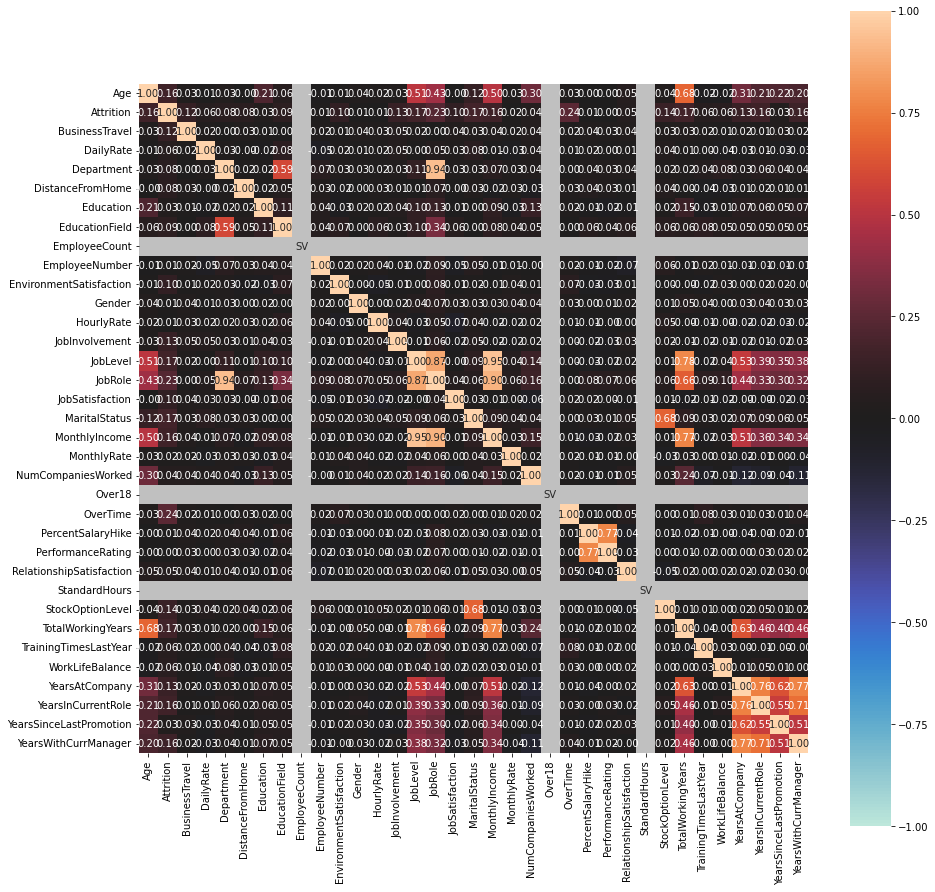

In [9]:
correlation_matrix = associations(data, compute_only=False, figsize=(15,15)) # Compute only default value is False, it give correlation heatmap of all variables

This looks messy because we have 35 variables. Let's try to create this heatmap for 10 variables.

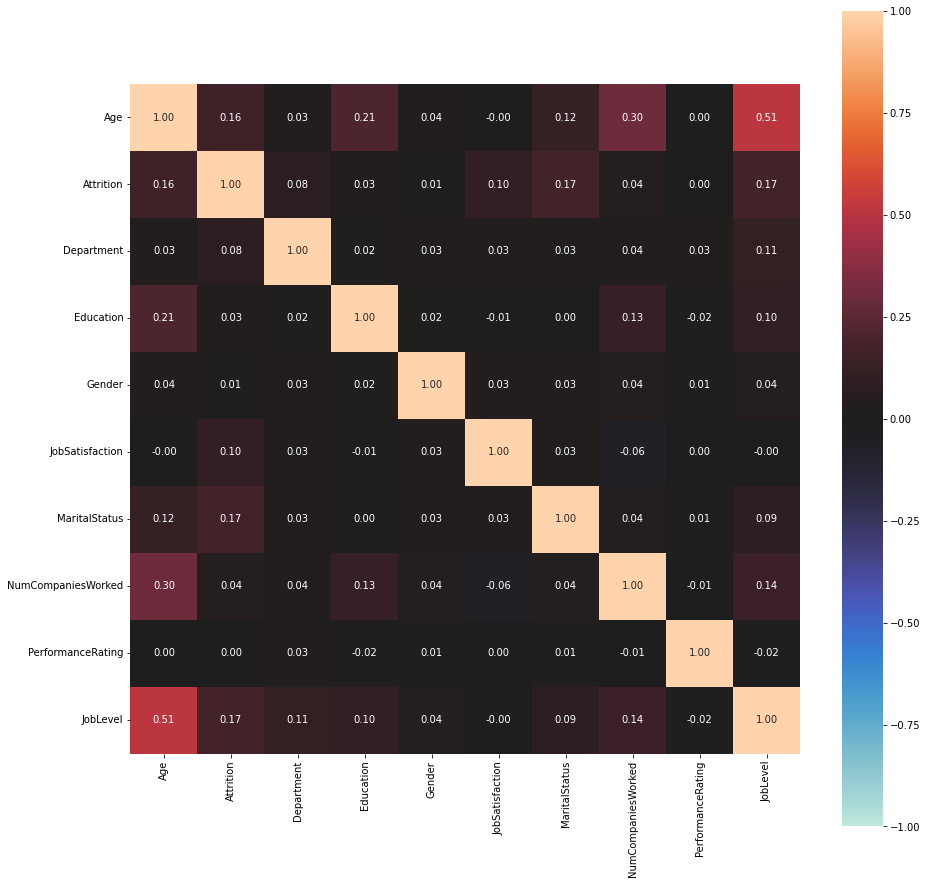

In [10]:
smaller_data = data[['Age', 'Attrition', 'Department', 'Education', 'Gender', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'PerformanceRating', 'JobLevel']]
correlation_matrix = associations(smaller_data, compute_only=False, figsize=(15,15)) # Compute only default value is False, it give correlation heatmap of all variables

Wow 😮 We got a beautiful correlation heatmap.

As a result, calculating correlation for categorical variables might seem difficult, but thanks to this library, we can easily obtain correlation for the whole dataset and get a heatmap in seconds.

Thank you 🤗